In [1]:
from sklearn.preprocessing import RobustScaler
from datetime import datetime
import pandas as pd
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
%matplotlib inline

In [2]:
# Set up logging
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s"
)

## Starter Pack

In [3]:

user_filepath = "../data/User Listening History.csv"
music_filepath = "../data/Music Info.csv"
user_history = pd.read_csv(user_filepath)
music_info = pd.read_csv(music_filepath)

In [4]:
# Generate synthetic demographic data for users
user_ids = user_history["user_id"].unique()
np.random.seed(0)

# Synthetic ages between 13 and 65
ages = np.random.randint(13, 65, size=len(user_ids))

# Synthetic genders for Male and Female
genders = np.random.choice([0,1], size=len(user_ids))

# Create the user demographic dataframe
user_demographics = pd.DataFrame(
    {"user_id": user_ids,
        "age": ages,
        "gender": genders}
)

# Create the user demographics DataFrame
user_demographics = pd.DataFrame({
    'user_id': user_ids,
    'age': ages,
    'gender': genders
})

# Merge user demographics with user history
user_history_demo = pd.merge(user_history, user_demographics, on='user_id')

# Merge the result with music info to get rich features
full_data = pd.merge(user_history_demo, music_info, on='track_id')

In [5]:
full_data.columns

Index(['track_id', 'user_id', 'playcount', 'age', 'gender', 'name', 'artist',
       'spotify_preview_url', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [6]:
full_data['age'].value_counts()

age
39    191232
42    191127
64    191067
54    190655
21    190007
50    190004
58    189925
41    189862
24    189556
44    189497
25    189460
16    189027
29    188469
19    188272
35    188159
60    188076
32    188011
14    187937
61    187842
38    187723
36    187692
31    187630
52    187470
56    187353
53    187335
40    187028
43    186950
57    186938
30    186871
13    186597
63    186478
22    186020
47    185755
37    185693
49    185645
55    185629
51    185584
59    185490
17    184872
45    184797
23    184493
34    184437
27    184010
46    183729
26    183721
20    183597
33    183283
62    183225
28    182947
48    181947
18    181539
15    180638
Name: count, dtype: int64

In [7]:
full_data.head()

,track_id,user_id,playcount,age,gender,name,artist,spotify_preview_url,spotify_id,tags,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Nothing From Nothing,Billy Preston,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,0d42LKqrWFVu05jAv9mwwE,"soul, funk, piano, 70s, oldies",...,9,-5.206,0,0.0276,0.58500,0.055000,0.3310,0.939,102.792,4
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Paper Gangsta,Lady Gaga,https://p.scdn.co/mp3-preview/5d27f0eb10363c13...,079ZOccLpNsrEiKBaiTrqI,"electronic, pop, female_vocalists, dance, pian...",...,10,-9.344,0,0.0579,0.80400,0.782000,0.1050,0.800,100.002,4
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Soy,Gipsy Kings,https://p.scdn.co/mp3-preview/a103c32c238829f9...,1D3gFdVhv8iJNMTih2Geq3,guitar,...,5,-11.647,1,0.0673,0.69200,0.000002,0.1100,0.851,104.518,4
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Stacked Actors,Foo Fighters,https://p.scdn.co/mp3-preview/d7350c743c3d917f...,1vziI0NCJKrqKiG94COHBa,"rock, alternative, alternative_rock, hard_rock...",...,7,-5.145,1,0.0500,0.00203,0.001020,0.2340,0.670,134.898,4
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Heaven's Gonna Burn Your Eyes,Thievery Corporation,https://p.scdn.co/mp3-preview/c7f3b22fb4a680f0...,4SnH0V1cnEPUqMSzgDlxKb,"electronic, female_vocalists, ambient, chillou...",...,9,-9.812,1,0.0286,0.63500,0.521000,0.0637,0.323,152.411,4


In [8]:
full_data['year'].max()

np.int64(2020)

In [9]:
def filter_music_by_year(full_data, year):
    """
    Filters the music information DataFrame to include only tracks from the specified year.

    Parameters:
    music_info_df (pd.DataFrame): DataFrame containing music information.
    year (int): The year to filter the music by.

    Returns:
    pd.DataFrame: Filtered DataFrame containing only tracks from the specified year.
    """
    filtered_df = full_data[full_data['year'] == year]
    return filtered_df

# Example usage:
filtered_music = filter_music_by_year(full_data, 2020)
filtered_music

,track_id,user_id,playcount,age,gender,name,artist,spotify_preview_url,spotify_id,tags,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
7847,TRUFSKS128F9317300,89bc5817b49ec68b6f2ccd677676c51da9139d6d,1,46,1,Stone the Crow,Down,https://p.scdn.co/mp3-preview/ce30fbb22ad049dc...,0n3iMDinxSVg3WbOBajMaH,"metal, hard_rock, heavy_metal",...,11,-6.117,0,0.0398,0.013900,0.009550,0.0868,0.556,106.437,4
16402,TRQQXIO128E078166F,7da61f8ef076d56881f244daf7fc92e1f7872d56,1,47,0,Rush Hour Soul,Supergrass,https://p.scdn.co/mp3-preview/dae95db8d0160620...,0B9JMfQVsDz9p5qQhfLV4T,"rock, britpop",...,2,-6.464,1,0.0602,0.000027,0.545000,0.1190,0.458,138.883,4
28284,TRUFSKS128F9317300,f30c3b5cf1ac6bef152d9275dda506888e508a9f,5,19,0,Stone the Crow,Down,https://p.scdn.co/mp3-preview/ce30fbb22ad049dc...,0n3iMDinxSVg3WbOBajMaH,"metal, hard_rock, heavy_metal",...,11,-6.117,0,0.0398,0.013900,0.009550,0.0868,0.556,106.437,4
30157,TRFMWRW128F92FCDF3,4001e33ad824e5d161234114258f95021a64912a,1,35,1,Feel Me,Selena Gomez,https://p.scdn.co/mp3-preview/c816150db5b5958d...,6XXYdF6pJR1K3wKvuxmu7n,"pop, rnb",...,2,-6.703,0,0.0433,0.440000,0.000773,0.0734,0.392,99.989,4
31162,TRUFSKS128F9317300,7270853150884d7a94cf8eb0c9d80b3b372053b0,1,44,0,Stone the Crow,Down,https://p.scdn.co/mp3-preview/ce30fbb22ad049dc...,0n3iMDinxSVg3WbOBajMaH,"metal, hard_rock, heavy_metal",...,11,-6.117,0,0.0398,0.013900,0.009550,0.0868,0.556,106.437,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660208,TRFMWRW128F92FCDF3,d5326f5eb72337d8dc1fc4e8ff50ed88ed730fe6,1,39,1,Feel Me,Selena Gomez,https://p.scdn.co/mp3-preview/c816150db5b5958d...,6XXYdF6pJR1K3wKvuxmu7n,"pop, rnb",...,2,-6.703,0,0.0433,0.440000,0.000773,0.0734,0.392,99.989,4
9667896,TRQQXIO128E078166F,8ec0c245d6a11ad95af17a34a978708b4711d075,1,30,0,Rush Hour Soul,Supergrass,https://p.scdn.co/mp3-preview/dae95db8d0160620...,0B9JMfQVsDz9p5qQhfLV4T,"rock, britpop",...,2,-6.464,1,0.0602,0.000027,0.545000,0.1190,0.458,138.883,4
9671877,TRUFSKS128F9317300,a801a2eda009a4573ef034b873c51907eb70087a,1,32,1,Stone the Crow,Down,https://p.scdn.co/mp3-preview/ce30fbb22ad049dc...,0n3iMDinxSVg3WbOBajMaH,"metal, hard_rock, heavy_metal",...,11,-6.117,0,0.0398,0.013900,0.009550,0.0868,0.556,106.437,4
9699226,TRUFSKS128F9317300,6f275b1a7b70195f79b7567471168a00b6d3bb75,2,45,0,Stone the Crow,Down,https://p.scdn.co/mp3-preview/ce30fbb22ad049dc...,0n3iMDinxSVg3WbOBajMaH,"metal, hard_rock, heavy_metal",...,11,-6.117,0,0.0398,0.013900,0.009550,0.0868,0.556,106.437,4


In [10]:
full_data.columns

Index(['track_id', 'user_id', 'playcount', 'age', 'gender', 'name', 'artist',
       'spotify_preview_url', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [11]:
print(full_data.head(1))

             track_id                                   user_id  playcount  \
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   

   age  gender                  name         artist  \
0   57       0  Nothing From Nothing  Billy Preston   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/340c79f3f19b448e...  0d42LKqrWFVu05jAv9mwwE   

                             tags  ... key  loudness  mode  speechiness  \
0  soul, funk, piano, 70s, oldies  ...   9    -5.206     0       0.0276   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.585             0.055     0.331    0.939  102.792               4  

[1 rows x 25 columns]


In [12]:
# Display basic information
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   track_id             object 
 1   user_id              object 
 2   playcount            int64  
 3   age                  int64  
 4   gender               int64  
 5   name                 object 
 6   artist               object 
 7   spotify_preview_url  object 
 8   spotify_id           object 
 9   tags                 object 
 10  genre                object 
 11  year                 int64  
 12  duration_ms          int64  
 13  danceability         float64
 14  energy               float64
 15  key                  int64  
 16  loudness             float64
 17  mode                 int64  
 18  speechiness          float64
 19  acousticness         float64
 20  instrumentalness     float64
 21  liveness             float64
 22  valence              float64
 23  tempo                float64
 24

In [13]:
full_data.describe()

,playcount,age,gender,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06,9.711301e+06
mean,2.630946e+00,3.854159e+01,4.993224e-01,2.004846e+03,2.458999e+05,5.286417e-01,6.781073e-01,5.351573e+00,-7.825038e+00,6.474253e-01,7.136620e-02,2.206536e-01,1.679303e-01,2.047823e-01,4.658363e-01,1.234290e+02,3.913533e+00
std,5.706324e+00,1.500207e+01,4.999996e-01,7.017311e+00,9.017579e+04,1.708274e-01,2.362942e-01,3.556024e+00,3.952011e+00,4.777717e-01,7.312056e-02,2.971524e-01,2.992913e-01,1.686200e-01,2.508728e-01,2.907696e+01,3.601450e-01
min,1.000000e+00,1.300000e+01,0.000000e+00,1.900000e+03,1.439000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.600000e+01,0.000000e+00,2.002000e+03,1.979460e+05,4.130000e-01,5.230000e-01,2.000000e+00,-9.623000e+00,0.000000e+00,3.350000e-02,4.230000e-03,3.830000e-06,9.750000e-02,2.620000e-01,1.008950e+02,4.000000e+00
50%,1.000000e+00,3.900000e+01,0.000000e+00,2.007000e+03,2.335730e+05,5.320000e-01,7.250000e-01,5.000000e+00,-6.919000e+00,1.000000e+00,4.440000e-02,6.110000e-02,1.140000e-03,1.330000e-01,4.420000e-01,1.218570e+02,4.000000e+00
75%,2.000000e+00,5.200000e+01,1.000000e+00,2.009000e+03,2.750400e+05,6.480000e-01,8.810000e-01,9.000000e+00,-5.089000e+00,1.000000e+00,7.450000e-02,3.430000e-01,1.540000e-01,2.760000e-01,6.710000e-01,1.420110e+02,4.000000e+00
max,2.948000e+03,6.400000e+01,1.000000e+00,2.020000e+03,2.510920e+06,9.860000e-01,1.000000e+00,1.100000e+01,3.642000e+00,1.000000e+00,9.540000e-01,9.960000e-01,9.990000e-01,9.980000e-01,9.890000e-01,2.388950e+02,5.000000e+00


In [14]:
# check for number of missing values
full_data.isnull().sum()

track_id                     0
user_id                      0
playcount                    0
age                          0
gender                       0
name                         0
artist                       0
spotify_preview_url          0
spotify_id                   0
tags                     74120
genre                  3388151
year                         0
duration_ms                  0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
dtype: int64

In [15]:
full_data.shape

(9711301, 25)

In [16]:
full_data.dropna(inplace=True)

In [17]:
full_data.shape

(6280058, 25)

## 1. Data Cleaning


In [18]:
# Handling missing values
full_data['genre'] = full_data['genre'].fillna('Unknown')
full_data['tags'] = full_data['tags'].fillna('')

In [19]:
# Drop duplicates
full_data.drop_duplicates(inplace=True)
full_data.shape

(6280058, 25)

## 2. Feature Analysis


2024-11-23 17:47:12,103 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-23 17:47:12,104 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-23 17:47:12,105 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-23 17:47:12,107 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='s

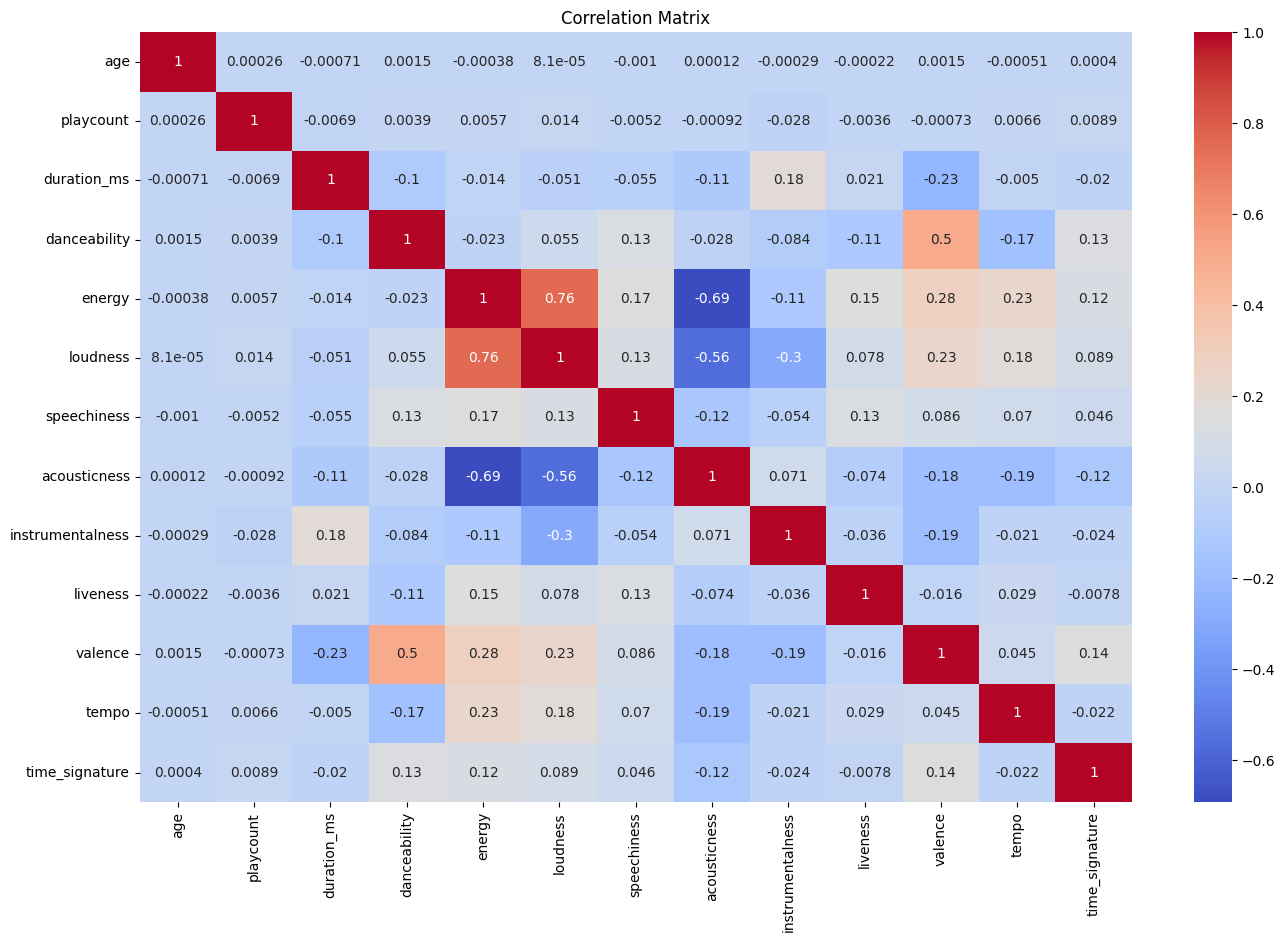

In [20]:
## Correlation matrix for numerical features
numeric_features = ['age', 'playcount', 'duration_ms', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature']

plt.figure(figsize=(16, 10))
sns.heatmap(full_data[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

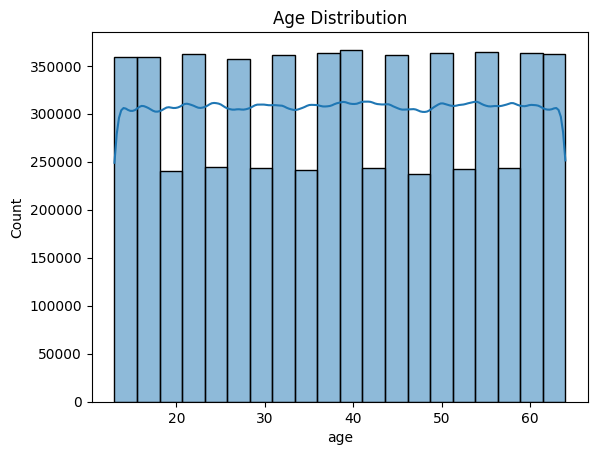

In [21]:
## Distribution of age
sns.histplot(full_data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [22]:
df = full_data.copy()
df.columns

Index(['track_id', 'user_id', 'playcount', 'age', 'gender', 'name', 'artist',
       'spotify_preview_url', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [23]:
df.to_csv('msd_full_data.csv', index=False)

In [4]:
import pandas as pd
df = pd.read_csv('../data/msd_full_data_processed.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280058 entries, 0 to 6280057
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   track_id             object 
 1   user_id              object 
 2   playcount            int64  
 3   age                  int64  
 4   gender               int64  
 5   name                 object 
 6   artist               object 
 7   spotify_preview_url  object 
 8   spotify_id           object 
 9   tags                 object 
 10  genre                object 
 11  year                 int64  
 12  duration_ms          int64  
 13  danceability         float64
 14  energy               float64
 15  key                  int64  
 16  loudness             float64
 17  mode                 int64  
 18  speechiness          float64
 19  acousticness         float64
 20  instrumentalness     float64
 21  liveness             float64
 22  valence              float64
 23  tempo                float64
 24

In [ ]:
# Univariate Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression

def select_features_univariate(X, y, n_features=5):
    # For regression problems
    selector = SelectKBest(score_func=mutual_info_regression, k=n_features)
    
    # For classification problems
    # selector = SelectKBest(score_func=f_classif, k=n_features)
    
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names
    selected_features = X.columns[selector.get_support()].tolist()
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)
    
    print("Selected features:", selected_features)
    print("\nFeature scores:\n", feature_scores)
    
    return X_selected, selected_features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

def recursive_feature_elimination(X, y, n_features=5):
    estimator = RandomForestRegressor(random_state=42)
    selector = RFE(estimator=estimator, n_features_to_select=n_features)
    
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names
    selected_features = X.columns[selector.support_].tolist()
    
    # Get feature rankings
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': selector.ranking_
    }).sort_values('Ranking')
    
    print("Selected features:", selected_features)
    print("\nFeature rankings:\n", feature_ranking)
    
    return X_selected, selected_features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

def feature_importance_selection(X, y, threshold='median'):
    # Train a Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    
    # Select features using importance scores
    selector = SelectFromModel(rf, prefit=True, threshold=threshold)
    X_selected = selector.transform(X)
    
    # Get feature importance scores
    importance_scores = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    selected_features = X.columns[selector.get_support()].tolist()
    
    print("Selected features:", selected_features)
    print("\nFeature importance:\n", importance_scores)
    
    return X_selected, selected_features

In [ ]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

def comprehensive_feature_selection(df, target_column):
    # Only select numeric columns for feature selection
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    X = df[numeric_cols].drop(target_column, axis=1)
    y = df[target_column]
    
    # Remove non-informative columns
    X = X.drop(['year', 'time_signature'], axis=1, errors='ignore')  # These columns have low variance
    
    # 1. Remove constant and quasi-constant features
    def remove_constant_features(X, threshold=0.01):
        constant_filter = VarianceThreshold(threshold=threshold)
        constant_filter.fit(X)
        constant_features = X.columns[~constant_filter.get_support()].tolist()
        print(f"Constant features removed: {constant_features}")
        return X.loc[:, constant_filter.get_support()]
    
    # 2. Remove highly correlated features
    def remove_correlated_features(X, threshold=0.85):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
        print(f"Correlated features removed: {to_drop}")
        return X.drop(to_drop, axis=1)
    
    # Execute pipeline
    X = remove_constant_features(X)
    X = remove_correlated_features(X)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Get features from different methods
    _, univariate_features = select_features_univariate(X_scaled, y)
    _, importance_features = feature_importance_selection(X_scaled, y)
    
    # Find features selected by both methods
    final_features = list(set(univariate_features) & set(importance_features))
    
    print("\nFinal selected features:", final_features)
    return final_features

# Example usage
def main():
    selected_features = comprehensive_feature_selection(df, target_column='playcount')
    final_df = df[selected_features + ['playcount']]
    return final_df

main()

Constant features removed: ['speechiness']
Correlated features removed: []
Selected features: ['duration_ms', 'loudness', 'acousticness', 'instrumentalness', 'tempo']

Feature scores:
              Feature     Score
12             tempo  0.034761
2        duration_ms  0.032209
6           loudness  0.030151
8       acousticness  0.022034
9   instrumentalness  0.021187
11           valence  0.013245
10          liveness  0.012726
4             energy  0.011760
3       danceability  0.011605
5                key  0.001281
0                age  0.000532
7               mode  0.000193
1             gender  0.000038


/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features: ['age', 'gender', 'duration_ms', 'loudness', 'instrumentalness', 'liveness', 'tempo']

Feature importance:
              Feature  Importance
0                age    0.523469
1             gender    0.178920
9   instrumentalness    0.048879
10          liveness    0.033202
6           loudness    0.033058
12             tempo    0.029336
2        duration_ms    0.028469
3       danceability    0.027043
8       acousticness    0.026727
11           valence    0.025678
4             energy    0.024995
5                key    0.015541
7               mode    0.004682

Final selected features: ['duration_ms', 'loudness', 'instrumentalness', 'tempo']


,duration_ms,loudness,instrumentalness,tempo,playcount
0,155453,-5.206,0.055000,102.792,1
1,260000,-9.344,0.782000,100.002,1
2,256440,-5.145,0.001020,134.898,1
3,250360,-9.812,0.521000,152.411,1
4,222200,-4.423,0.002150,111.842,1
...,...,...,...,...,...
6280053,193706,-4.746,0.004680,140.024,1
6280054,320706,-3.307,0.000107,161.869,1
6280055,222333,-1.294,0.000000,133.966,1
6280056,208106,-3.472,0.000000,106.000,1


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

def validate_feature_selection(X, y, selected_features, sample_fraction=None, n_jobs=-1, k_features='all'):
    """
    Validates feature selection and model performance.

    Args:
        X (pd.DataFrame): Input features.
        y (pd.Series): Target variable.
        selected_features (list): List of selected features.
        sample_fraction (float, optional): Fraction of data to sample. Defaults to None (no sampling).
        n_jobs (int, optional): Number of jobs for parallel processing. Defaults to -1 (all cores).
        k_features (int or str, optional): Number of features to select with SelectKBest. 
                                           Defaults to 'all' (use all selected features).
    """
    if sample_fraction:
        X = X.sample(frac=sample_fraction, random_state=42)
        y = y.loc[X.index]

    k_best = len(selected_features) if k_features == 'all' else min(len(selected_features), k_features)

    pipeline = Pipeline([
        ('selector', SelectKBest(score_func=mutual_info_regression, k=k_best)),
        ('model', RandomForestRegressor(random_state=42, n_jobs=n_jobs))
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2', n_jobs=n_jobs)

    print(f"Cross-validation scores: {scores}")
    print(f"Average score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


# Example usage (replace with your actual data loading)
# Assuming 'df' is your DataFrame
# ... load your dataframe ...

numeric_cols = df.select_dtypes(include=np.number).columns  # More robust numeric type selection
target_column = 'playcount'

X = df[numeric_cols].drop(target_column, axis=1)
y = df[target_column]

selected_features = ['age', 'gender', 'duration_ms', 'loudness', 'instrumentalness', 'liveness', 'tempo']

X = X.drop(['year', 'time_signature'], axis=1, errors='ignore')

# Example usage with sampling, parallel processing, and reduced feature count for k_features
validate_feature_selection(X, y, selected_features, sample_fraction=0.1, n_jobs=-1, k_features=5)  # Use 10% of data and select top 5 features

Cross-validation scores: [0.01389085 0.0140158  0.00228573 0.00614936 0.00862949]
Average score: 0.009 (+/- 0.009)


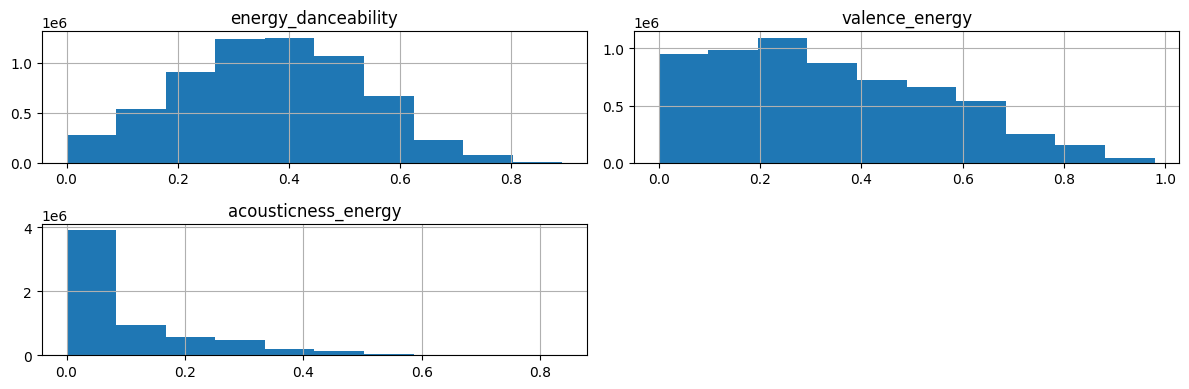

Correlation with playcount:
energy_danceability    0.006944
acousticness_energy    0.004782
valence_energy         0.000742
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Create age groups
def create_age_features(df):
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 25, 35, 50, 100],
                            labels=['Young', 'Adult', 'Middle_Age', 'Senior'])
    
    # Create dummy variables for age groups
    age_dummies = pd.get_dummies(df['age_group'], prefix='age')
    df = pd.concat([df, age_dummies], axis=1)
    
    return df

# 2. Normalize numerical features
def normalize_features(df):
    scaler = MinMaxScaler()
    numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness',
                         'speechiness', 'acousticness', 'instrumentalness',
                         'liveness', 'valence', 'tempo']
    
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

# 3. Create interaction features
def create_interaction_features(df):
    df['energy_danceability'] = df['energy'] * df['danceability']
    df['valence_energy'] = df['valence'] * df['energy']
    df['acousticness_energy'] = df['acousticness'] * df['energy']
    return df

# Apply all transformations
full_data = create_age_features(df)
full_data = normalize_features(df)
full_data = create_interaction_features(df)

# Show feature distributions
numerical_cols = ['energy_danceability', 'valence_energy', 'acousticness_energy']
full_data[numerical_cols].hist(figsize=(12,4))
plt.tight_layout()
plt.show()

# Display correlation with playcount
print("Correlation with playcount:")
print(full_data[numerical_cols].corrwith(full_data['playcount']).sort_values(ascending=False))

In [ ]:
selected_features
# df.drop(columns=[])

['age',
 'gender',
 'duration_ms',
 'loudness',
 'instrumentalness',
 'liveness',
 'tempo']

Summarize dataset:  98%|█████████▊| 322/327 [09:30<00:04,  1.09it/s, Missing diagram matrix]                          

: 

In [ ]:
df = pd.read_csv('../data/msd_full_data_processed.csv')

## Data Aggregation and Transformation

In [ ]:
df.columns

Index(['track_id', 'user_id', 'playcount', 'age', 'gender', 'name', 'artist',
       'spotify_preview_url', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
interaction_data = df.groupby(['user_id', 'track_id'])['playcount'].sum().reset_index()

In [ ]:
interaction_data = df.groupby(['user_id', 'track_id'])['playcount'].sum().reset_index()
user_ids = interaction_data['user_id'].unique()
track_ids = interaction_data['track_id'].unique()

user_id_to_index = {id: index for index, id in enumerate(user_ids)}
track_id_to_index = {id: index for index, id in enumerate(track_ids)}

interaction_data['user_idx'] = interaction_data['user_id'].map(user_id_to_index)
interaction_data['track_idx'] = interaction_data['track_id'].map(track_id_to_index)

In [ ]:
interaction_data

,user_id,track_id,playcount,user_idx,track_idx
0,00000b722001882066dff9d2da8a775658053ea0,TRQEBOU128F425D087,1,0,0
1,00001638d6189236866af9bbf309ae6c2347ffdc,TRBCDMC128F1452976,1,1,1
2,0000175652312d12576d9e6b84f600caa24c4715,TRHVDTF128F428D64C,1,2,2
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,TREZYWT128F93191B7,2,3,3
4,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,TRIYKXW128F92FDF08,2,3,4
...,...,...,...,...,...
6280053,fffff9534445f481b6ab91c345500083d2ce4df1,TRLSCIQ12903CFDBEE,1,890232,2667
6280054,fffff9534445f481b6ab91c345500083d2ce4df1,TRONYHY128F92C9D11,5,890232,17
6280055,fffff9534445f481b6ab91c345500083d2ce4df1,TRPCZWR128F92F4129,1,890232,4345
6280056,fffff9534445f481b6ab91c345500083d2ce4df1,TRXXVOG128F92F411D,1,890232,2161


In [ ]:
df_shape = df.shape
interaction_shape = interaction_data.shape
print(f"Original DataFrame shape: {df_shape}\nInteraction DataFrame shape: {interaction_shape}")

Original DataFrame shape: (6280058, 25)
Interaction DataFrame shape: (6280058, 5)


In [ ]:
interaction_data['playcount'].describe()

count    6.280058e+06
mean     1.902002e+00
std      1.396132e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: playcount, dtype: float64

In [ ]:
interaction_data['playcount'].value_counts()

playcount
1    3865265
2     972279
5     785782
3     420978
4     235754
Name: count, dtype: int64

In [ ]:
duplicate_pairs = df.duplicated(subset=['user_id', 'track_id'], keep=False)
num_duplicates = duplicate_pairs.sum()
print(f"Number of duplicate user-track pairs: {num_duplicates}")

Number of duplicate user-track pairs: 0
